### F. Linear Espacial:

Dado uma imagem $f(x,y)$ e um filtro $w(s,t)$ (w = weight), a saida da FLinear é uma combinacao linear dos valores de $f(x,y)$ ponderados por $w(s,t)$;

Seja ${x0, x1, x2}$, y = $3x0 + 5x1 + 12x2;$

**Corelação cruzada**

Percorrendo a imagem aplicando o filtro em torno de um ponto de referência(lembra do desenho na louza da aplicação).

\begin{equation}
  g(x, y) = \sum_{s=0}^{a}\sum_{s=0}^{b} w(s,t)f(x + s - \frac{a}{2}, y + t - \frac{b}{2})
\end{equation}

**Convolução**

\begin{equation}
  g(x, y) = \sum_{s=0}^{a}\sum_{s=0}^{b} w(s,t)f(x - s + \frac{a}{2}, y - t + \frac{b}{2})
\end{equation}

Muda apenas os sinais em relação a correlação, é como se invertesse o filtro e percorre-se a imagem.


In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
def correlation(img, w):
  num_rows, num_cols = img.shape
  
  # Medidas do filtro
  num_rows_f, num_cols_f = w.shape
  half_num_rows_f = num_rows_f // 2
  half_num_cols_f = num_cols_f // 2
  
  # 2 * half pq truncou a metade do filtro 
  img_padded = np.zeros((num_rows + 2 *          half_num_rows_f,
                        num_cols + 2 * half_num_cols_f),
                        dtype = np.uint8)
  
  # Translação das coordenadas da imagem pro img_padded, onde tem metade do filtro ao redor da imagems, entao cada coordenada original da imagem precisa ser somada de metade do filtro
  for row in range(num_rows):
    for col in range(num_cols):
      img_padded[row + half_num_rows_f, col + half_num_cols_f] = img[row, col]
  
  # Com numpy
  # img_padded = np.pad(img, half_num_cols_f)
  
  img_filtered = np.zeros((num_rows, num_cols))
  for row in range(num_rows):
    for col in range(num_cols):
      sum_region = 0
      for s in range(num_rows_f):
        for t in range(num_cols_f):
          sum_region += w[s, t] * img_padded[row + s, col + t]
      
      # Numpy
      #patch = img_padded[row:row + num_rows_f, 
      #                   col:col+num_cols_f]
      #img_filtered[row, col] = np.sum(w * patch)
      
      img_filtered[row, col] = sum_region
      
  return img_filtered

In [100]:
def convolution(img, w):
  w_inv = w[::-1, ::-1]
  img_filtered = correlation(img, w_inv)

  return img_filtered

In [101]:
signal = np.array([[2, 3, 1, 4, 3, 2, 1, 1, 2]])

w = np.array([[1, 2, 3]])

signal_filtered = correlation(signal, w)
signal_filtered

array([[13., 11., 17., 18., 16., 10.,  7.,  9.,  5.]])

In [102]:
signal_filtered = convolution(signal, w)
signal_filtered

array([[ 7., 13., 15., 14., 20., 14.,  9.,  7.,  7.]])

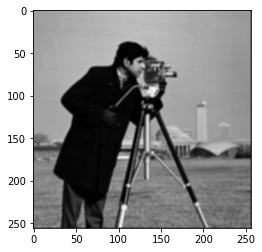

In [103]:
img = plt.imread('Imgs/cameraman.tiff')

w = np.array([
  [1, 1, 1],
  [1, 1, 1],
  [1, 1, 1]
])

img_cor_fil = correlation(img, w)

plt.imshow(img_cor_fil, cmap="gray")

### Suavização

Filtros de média é importante terem como soma 1, para não alterar a escala dos sinais. Não aumentar/diminuir brilho, etc, assim não se altera a intensidade da imagem.

**Filtro Gaussiano**

\begin{equation}
  f(x) = \frac{1}{\sqrt {2\pi\sigma}}e^{-{\frac{(x-\mu)^2}{2\sigma ^2}}}
\end{equation}

O parâmetro $\sigma$ ajusta o grau da suavização, como regra prática usar um filtro de tamanho 6 $\sigma$.

**Mediana**

\begin{equation}
  f(x,y ) = mediana_{(s,t) \in S_{xy}}[f(s,t)]
\end{equation}


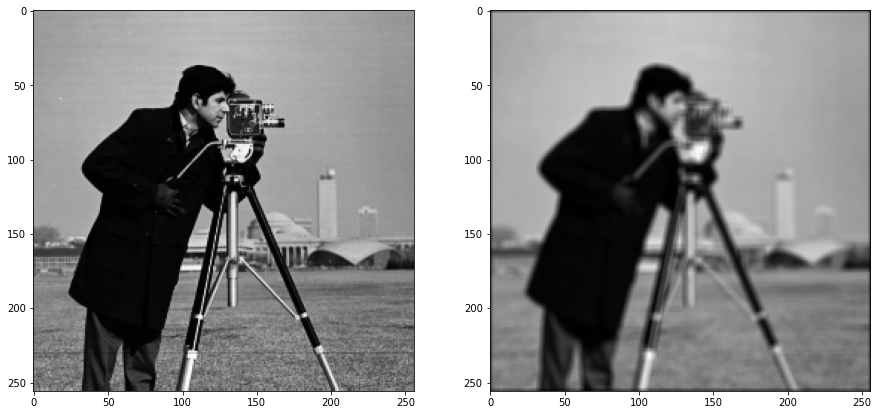

In [104]:
s = 5 # Tamanho do filtro

w = np.full([s, s], 1 / s ** 2) # Média simples

img_smoothed = convolution(img, w)

plt.figure(figsize= [15, 15])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img_smoothed, cmap = 'gray')


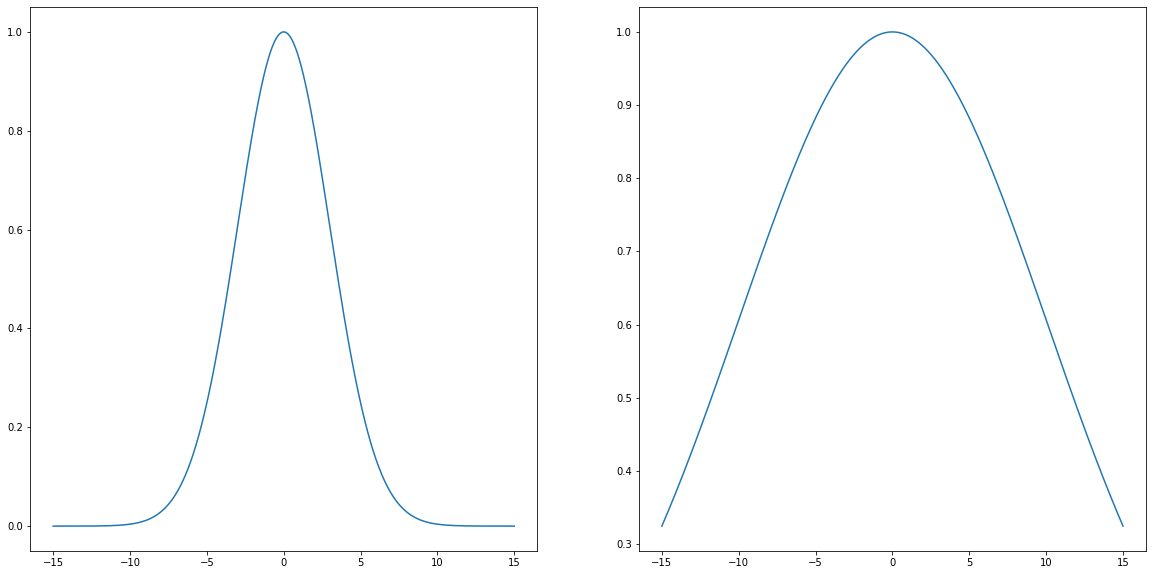

In [105]:
sigma = 3 # Largura da função 
sigma2 = 10

x = np.linspace(-5*sigma, 5*sigma, 1000)

y = np.exp(-x**2 / (2*sigma**2))
y2 = np.exp(-x**2 / (2*sigma2**2))
plt.figure(figsize=[20,10])
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.plot(x, y2)

In [106]:
def gaussian_filter_1d(filter_size):
  
  sigma = filter_size / 6
  
  x = np.linspace(-3*sigma, 3*sigma, filter_size)
  y = np.exp(-x**2 / (2*sigma**2))
  
  # Garantindo soma = 1 para nao alterar a intensidade da imagem
  y = y / np.sum(y)
  
  return y
  
y = gaussian_filter_1d(5)
print(y)

[0.00664603 0.19422555 0.59825683 0.19422555 0.00664603]


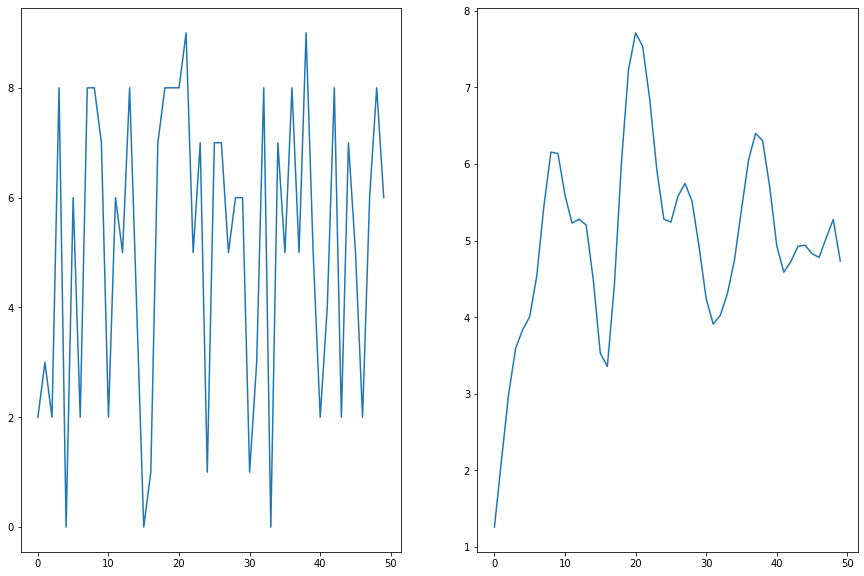

In [107]:
s = 10
# Sinal aleatorio
signal = np.random.randint(0, 10, size=(1, 50))

w = gaussian_filter_1d(s).reshape(1, s) # CONVERTENDO PARA UMA MATRIZ DE 1 LINHA

w2 = np.array(gaussian_filter_1d(s))
filtered_signal = convolution(signal, w)

plt.figure(figsize=[15,10])
plt.subplot(1, 2, 1)
plt.plot(signal[0])
plt.subplot(1, 2, 2)
plt.plot(filtered_signal[0])

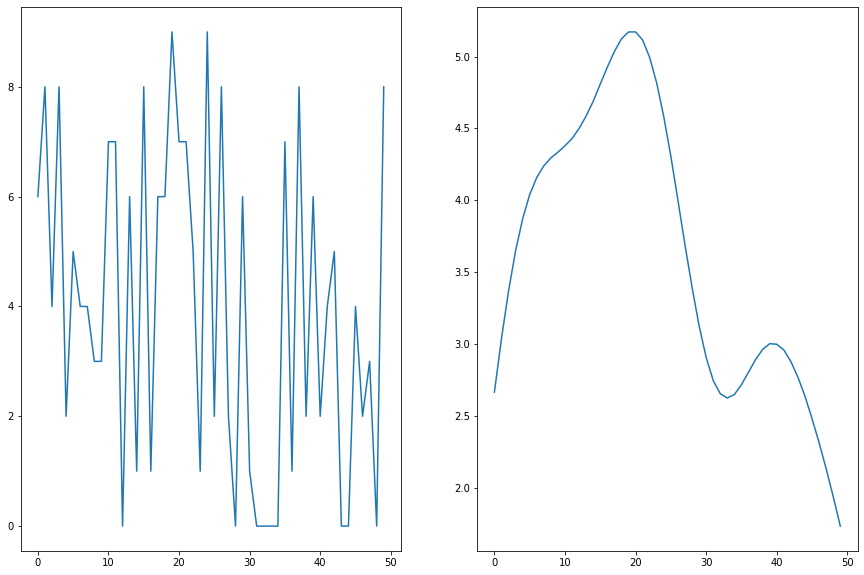

In [108]:
s = 30
# Sinal aleatorio
signal = np.random.randint(0, 10, size=(1, 50))

w = gaussian_filter_1d(s).reshape(1, s) # CONVERTENDO PARA UMA MATRIZ DE 1 LINHA

w2 = np.array(gaussian_filter_1d(s))
filtered_signal = convolution(signal, w)

plt.figure(figsize=[15,10])
plt.subplot(1, 2, 1)
plt.plot(signal[0])
plt.subplot(1, 2, 2)
plt.plot(filtered_signal[0])

In [109]:
def correlation(img, w):
  num_rows, num_cols = img.shape
  
  # Medidas do filtro
  num_rows_f, num_cols_f = w.shape
  half_num_rows_f = num_rows_f // 2
  half_num_cols_f = num_cols_f // 2
  
  # 2 * half pq truncou a metade do filtro 
  img_padded = np.zeros((num_rows + 2 * half_num_rows_f,
                        num_cols + 2 * half_num_cols_f))
  
  # Translação das coordenadas da imagem pro img_padded, onde tem metade do filtro ao redor da imagems, entao cada coordenada original da imagem precisa ser somada de metade do filtro
  for row in range(num_rows):
    for col in range(num_cols):
      img_padded[row + half_num_rows_f, col + half_num_cols_f] = img[row, col]
  
  # Com numpy
  # img_padded = np.pad(img, half_num_cols_f)
  
  img_filtered = np.zeros((num_rows, num_cols))
  for row in range(num_rows):
    for col in range(num_cols):
      sum_region = 0
      for s in range(num_rows_f):
        for t in range(num_cols_f):
          sum_region += w[s, t] * img_padded[row + s, col + t]
      
      # Numpy
      #patch = img_padded[row:row + num_rows_f, 
      #                   col:col+num_cols_f]
      #img_filtered[row, col] = np.sum(w * patch)
      
      img_filtered[row, col] = sum_region
      
  return img_filtered

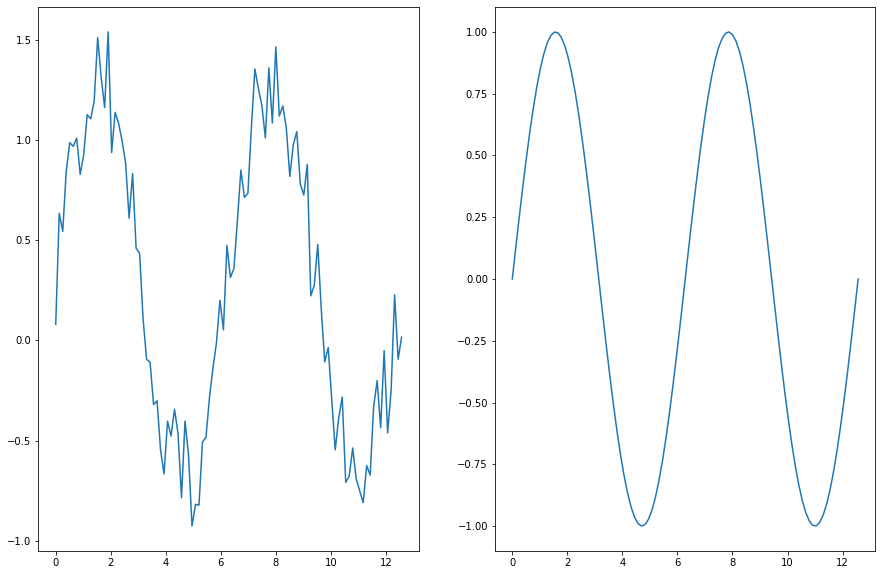

In [110]:
x = np.linspace(0, 4*np.pi, 100)
corrupted_sin = np.sin(x) + 0.6 * np.random.rand(len(x))

plt.figure(figsize=[15,10])
plt.subplot(1, 2, 1)
plt.plot(x, corrupted_sin)
plt.subplot(1, 2, 2)
plt.plot(x, np.sin(x))

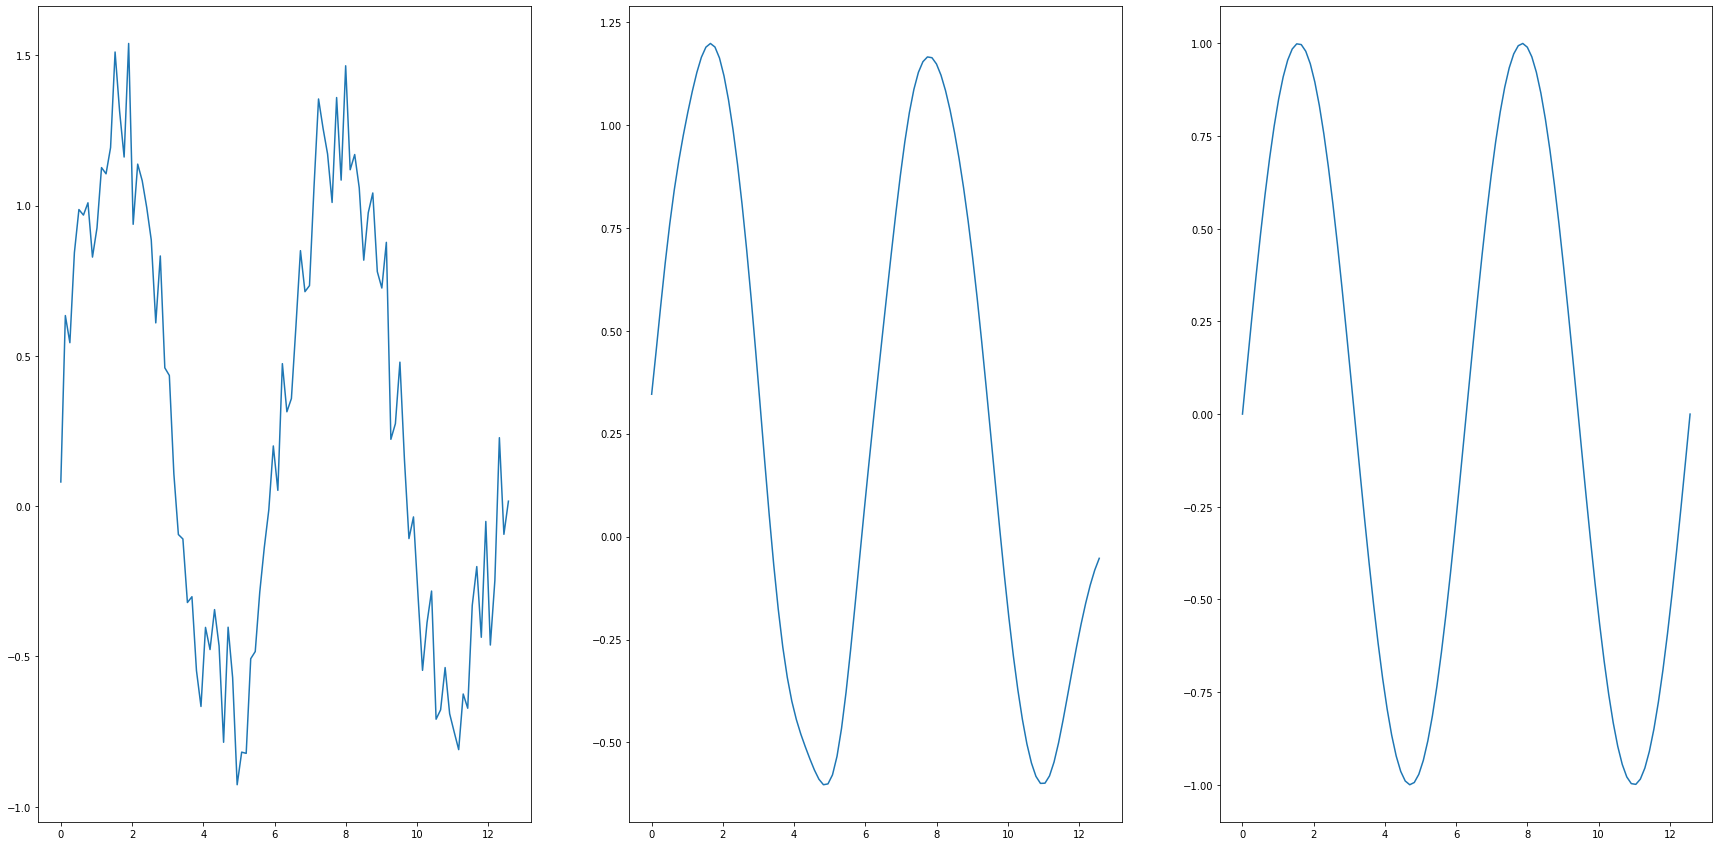

In [111]:
# Eliminacao do ruido com o filtro Gaussiano
s = 21
w = gaussian_filter_1d(s).reshape(1, s)

corrupted_sin_r = corrupted_sin.reshape(1, len(corrupted_sin))
filtered_signal = convolution(corrupted_sin_r, w)

plt.figure(figsize=[30,15])
plt.subplot(1, 3, 1)
plt.plot(x, corrupted_sin)
plt.subplot(1, 3, 2)
plt.plot(x, filtered_signal[0])
plt.subplot(1, 3, 3)
plt.plot(x, np.sin(x))

## 3. Filtro gaussiano bidimensional

Função gaussiana em duas dimensões:

\begin{equation}
z(x) = \frac{1}{2\pi\sigma^2}exp\left({-\frac{(x-\mu_x)^2 + (y-\mu_y)^2}{2\sigma^2}}\right)
\end{equation}
onde $\mu_x$ e $\mu_y$ indicam o ponto central da função em $x$ e $y$. Consideraremos que o centro da função é a origem ($\mu_x=0$ e $\mu_y=0$).

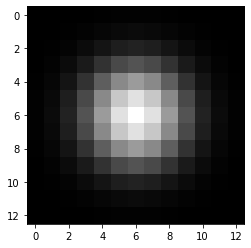

In [112]:
def gaussian_filter_2d(filter_size):
  
  sigma = filter_size / 6.
  
  x_vals = np.linspace(-3*sigma, 3*sigma, filter_size)
  y_vals = x_vals.copy()
  
  w = np.zeros((filter_size, filter_size))
  for row in range(filter_size):
    x = x_vals[row]
    for col in range(filter_size):
      y = y_vals[col]
      w[row, col] = np.exp(-(x**2 + y**2) / (2*sigma**2))
      
  w = w / np.sum(w)
  
  return w

w = gaussian_filter_2d(13)
plt.imshow(w, 'gray')

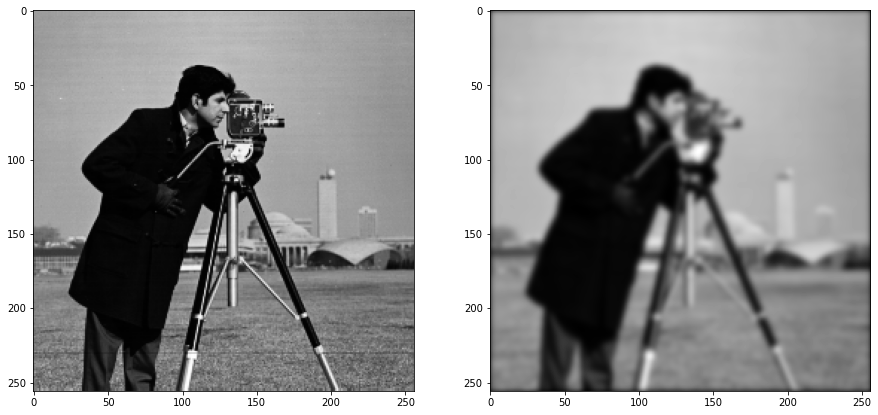

In [116]:
img_filtered = convolution(img, w)

plt.figure(figsize=[15, 15])

plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, 'gray')

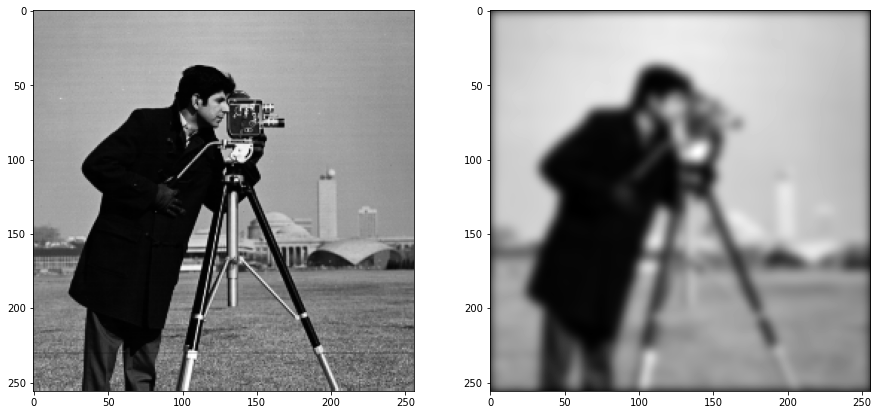

In [118]:
import scipy.signal

w = gaussian_filter_2d(21)
img_filtered = scipy.signal.convolve(img, w, mode='same')

plt.figure(figsize=[15, 15])

plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, 'gray')

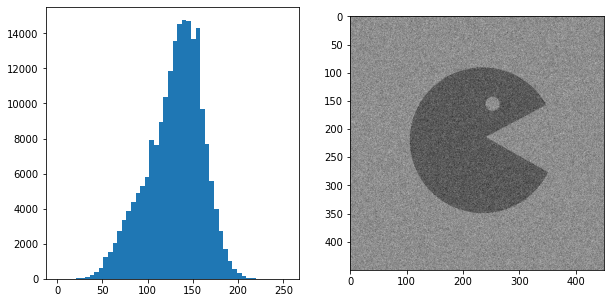

In [121]:
img = plt.imread('./Imgs/pacman.tiff')

plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
_ = plt.hist(img.flatten(), 50)

plt.subplot(1, 2, 2)
plt.imshow(img, 'gray')

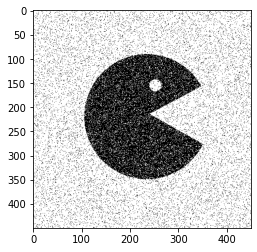

In [124]:
img_bin = img > 110
plt.imshow(img_bin, 'gray')

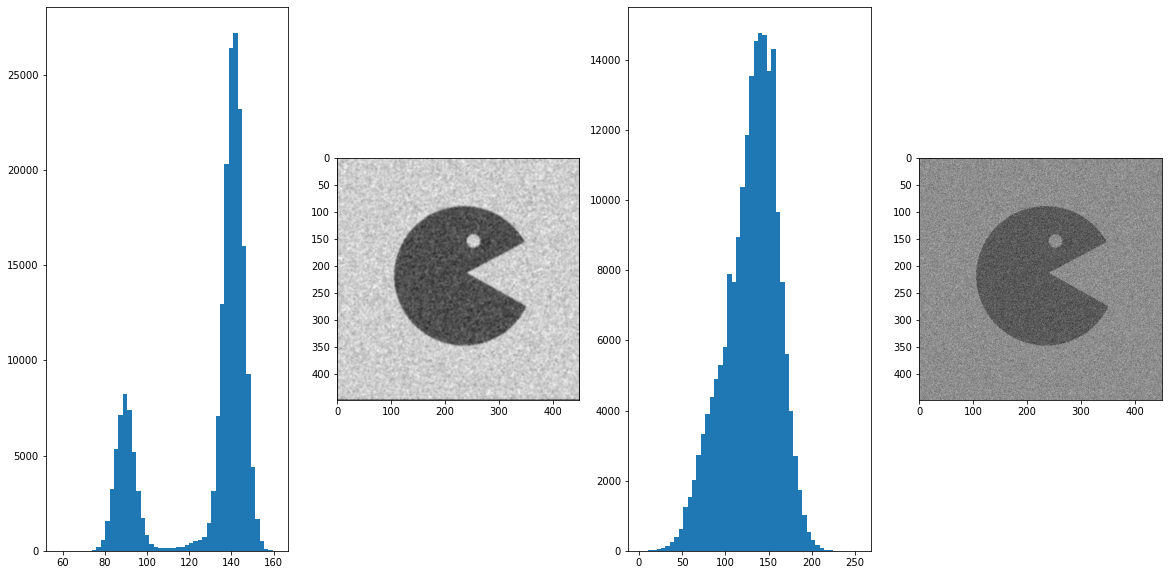

In [129]:
w = gaussian_filter_2d(9)

img_filtered = scipy.signal.convolve(img, w, mode='same')

plt.figure(figsize=[20, 10])

plt.subplot(1, 4, 1)
_ = plt.hist(img_filtered.flatten(), 50)

plt.subplot(1, 4, 2)
plt.imshow(img_filtered, 'gray')

plt.subplot(1, 4, 3)
_ = plt.hist(img.flatten(), 50)

plt.subplot(1, 4, 4)
plt.imshow(img, 'gray')


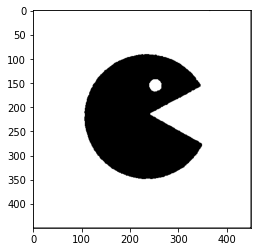

In [131]:
img_bin = img_filtered > 110
plt.imshow(img_bin, 'gray')